<a href="https://colab.research.google.com/github/FranciscoMoralesActuary/C-lculo-de-primas-de-opciones-call-y-put/blob/main/precios_put_call.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Código elaborado por Franciso Morales [LinkedIn](https://www.linkedin.com/in/francisco-morales-actuario/)**
---

---
#**0. Importación de librerías**🐍
---

In [ ]:
#Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
# **1. Inputs del código**🔍
---

In [ ]:
#Inputs para el código
K=float(input("¿Cuál es el precio del Strike (K) ? "))
S=float(input("¿Cuál es el precio del Spot (S) ? "))
σ=float(input("¿Cuál es la volatilidad (σ) (%) ? "))/100
R=float(input("¿Cuál  es la tasa local (R) (%) ? "))/100
r= float(input("¿Cuál es la tasa foránea (r) (%) ? "))/100
T= float(input("¿Cuál es el vencimiento en años (T) ? "))
t= float(input("¿Cuál es el Time Step (t)? "))
n=int(input("¿Cuántos escenarios quieres simular ? "))
μ=R-r

¿Cuál es el precio del Strike (K) ? 6000
¿Cuál es el precio del Spot (S) ? 5803
¿Cuál es la volatilidad (σ) (%) ? 12.43
¿Cuál  es la tasa local (R) (%) ? 4.28
¿Cuál es la tasa foránea (r) (%) ? 1.4
¿Cuál es el vencimiento en años (T) ? 0.5
¿Cuál es el Time Step (t)? 0.004
¿Cuántos escenarios quieres simular ? 500


---
# **2. Simulaciones del precio Spot**📊
---

$$
S_t=S_{t-1}+S_{t-1} \ ( \mu * dt + \sigma * \varepsilon* \sqrt{dt} \ )
$$

In [ ]:
#Lista para la columna Time
tiempo=np.arange(0,T+t,t)
#Número de elementos de Time
nt=len(tiempo)
#Dataframe vacio
#filas =  nt (Columnas Time acorde al Time Step)
#columnas = n (Número de escenarios a simular)
precios=pd.DataFrame(np.nan, index=range(nt), columns=range(n))
#Primer ciclo para las columnas
for j in range(0,n):
  #Primer elemento de todas las filas S
  precios.loc[0, j]=S
  #Segundo ciclo para las filas
  for i in range(1,nt):
    #ε con distribución normal
    ε=np.random.normal(0,1)
    #Calculo de los precios
    precios.loc[i, j]=precios.loc[i-1, j]+precios.loc[i-1, j]*(μ*t+ σ*ε*np.sqrt(t))
#Mostrar dataframe
precios

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,...,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000,5803.000000
1,5798.525303,5735.213410,5877.964487,5892.533145,5868.713492,5766.240796,5809.000560,5844.257160,5858.629034,5735.868434,...,5806.309748,5825.211454,5829.180486,5802.163553,5741.767241,5872.475561,5834.147592,5807.686196,5770.125238,5801.249242
2,5820.854424,5724.730254,5921.872358,5861.345852,5906.958125,5783.969144,5844.440391,5903.848808,5860.897805,5666.006860,...,5805.705455,5819.290031,5790.105160,5796.798767,5693.109271,5804.510913,5818.840645,5771.111453,5779.316686,5751.547811
3,5868.005830,5717.979430,5924.613608,5925.965766,5898.307891,5770.212335,5844.988067,5895.068799,5802.529273,5723.865867,...,5796.076378,5826.791982,5807.804857,5798.236244,5698.827908,5795.489396,5906.740720,5855.168482,5812.663903,5781.738874
4,5879.433462,5718.943274,5911.045854,5927.097480,5962.737574,5769.948587,5913.366867,5823.112600,5857.199692,5704.224049,...,5763.496863,5785.216457,5806.580947,5817.058154,5724.114690,5803.525890,5888.257587,5882.943049,5840.102023,5773.215018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,5889.211921,5743.622030,6152.700345,5822.238980,6627.290593,6047.411886,5844.566483,5957.916978,5030.485007,6183.498492,...,5590.787112,7462.032928,5195.547885,6047.399302,5851.466264,5420.588789,5626.974540,5952.350326,5441.439399,6202.117533
122,5877.889350,5724.442557,6155.591576,5843.764990,6614.173985,6048.893628,5867.915210,5930.873942,5079.710519,6167.813515,...,5638.755027,7497.336241,5274.049743,6074.218407,5837.316645,5399.391854,5615.957769,5973.618723,5392.231561,6199.265142
123,5887.482016,5743.856403,6168.794953,5834.993952,6572.541574,6004.593775,5893.532393,5947.935852,5090.905005,6210.132298,...,5620.438252,7559.107868,5379.413860,6134.027134,5774.179117,5407.204706,5687.261925,5901.572384,5414.093415,6184.117553
124,5939.468433,5736.720317,6192.812377,5878.695563,6568.784639,6057.485830,5890.394287,5953.510655,5068.147462,6058.020519,...,5672.552845,7591.698419,5373.202053,6150.881264,5754.161731,5393.380472,5694.441949,5894.255040,5439.515198,6159.454396


In [ ]:
#Inputs para el código de barrera alta y baja
b_a=float(input("¿Cuál es el valor de la barra alta ($) ? "))
b_b=float(input("¿Cuál es el valor de la barra baja ($) ? "))

¿Cuál es el valor de la barra alta ($) ? 6500
¿Cuál es el valor de la barra baja ($) ? 5500


In [ ]:
#Dataframe vacio
Pay_Call_Put=pd.DataFrame(data=np.nan,
                      index=np.arange(0,n),
                      columns=['Precio Máximo','Precio Mínimo',
                               'Payoff Call Alta', 'Payoff Call Baja',
                               'Payoff Put Alta', 'Payoff Put Baja',
                               'Precio Spot','Payoff Call','Payoff Put']
                      )
#Precio Spot := Fila del dataframe precios
Pay_Call_Put['Precio Spot']=precios.loc[nt-1]
Pay_Call_Put['Precio Máximo']=precios.max()
Pay_Call_Put['Precio Mínimo']=precios.min()
#Ciclo para calcular payoffs para cada simulación
for i in range(0,n):
  #Calculo del Payoff Call para cada fila
  Pay_Call_Put.loc[i,'Payoff Call Alta']=np.maximum(Pay_Call_Put.loc[i,'Precio Spot'] -K,0)/np.exp(R*T)
  Pay_Call_Put.loc[i,'Payoff Call Baja']=np.maximum(Pay_Call_Put.loc[i,'Precio Spot'] -K,0)/np.exp(R*T)
  #Calculo del Payoff Put para cada fila
  Pay_Call_Put.loc[i,'Payoff Put Alta']=np.maximum(K- Pay_Call_Put.loc[i,'Precio Spot'],0)/np.exp(R*T)
  Pay_Call_Put.loc[i,'Payoff Put Baja']=np.maximum(K- Pay_Call_Put.loc[i,'Precio Spot'],0)/np.exp(R*T)


#Mostrar dataframe
Pay_Call_Put

,Precio Máximo,Precio Mínimo,Precio Spot,Payoff Call,Payoff Put
0,6000.955153,5606.660809,5827.882161,0.000000,168.473649
1,6148.609335,5497.585035,5733.603317,0.000000,260.756361
2,6659.590374,5803.000000,6176.647855,172.907752,0.000000
3,6290.228741,5803.000000,5863.826463,0.000000,133.290383
4,6627.290593,5798.448454,6563.451254,551.521501,0.000000
...,...,...,...,...,...
495,6123.805367,5306.982026,5354.059382,0.000000,632.264347
496,5906.740720,5144.480909,5661.304264,0.000000,331.524652
497,5973.618723,5447.964972,5913.891745,0.000000,84.285116
498,6085.309736,5312.102808,5447.300167,0.000000,540.997716


In [ ]:
import pandas as pd
import numpy as np

# Ejemplo de DataFrame
df = pd.DataFrame({
    'A': [10, 5, 8, 12],
    'B': [7, 6, 9, 10]
})

C = 15  # constante

df['resultado'] = np.where(
    df['A'] > df['B'],
    0,
    np.maximum(abs(df['A'] - C), abs(df['B'] - C))
)

print(df)


---
#**3. Gráfico** 🎨
---

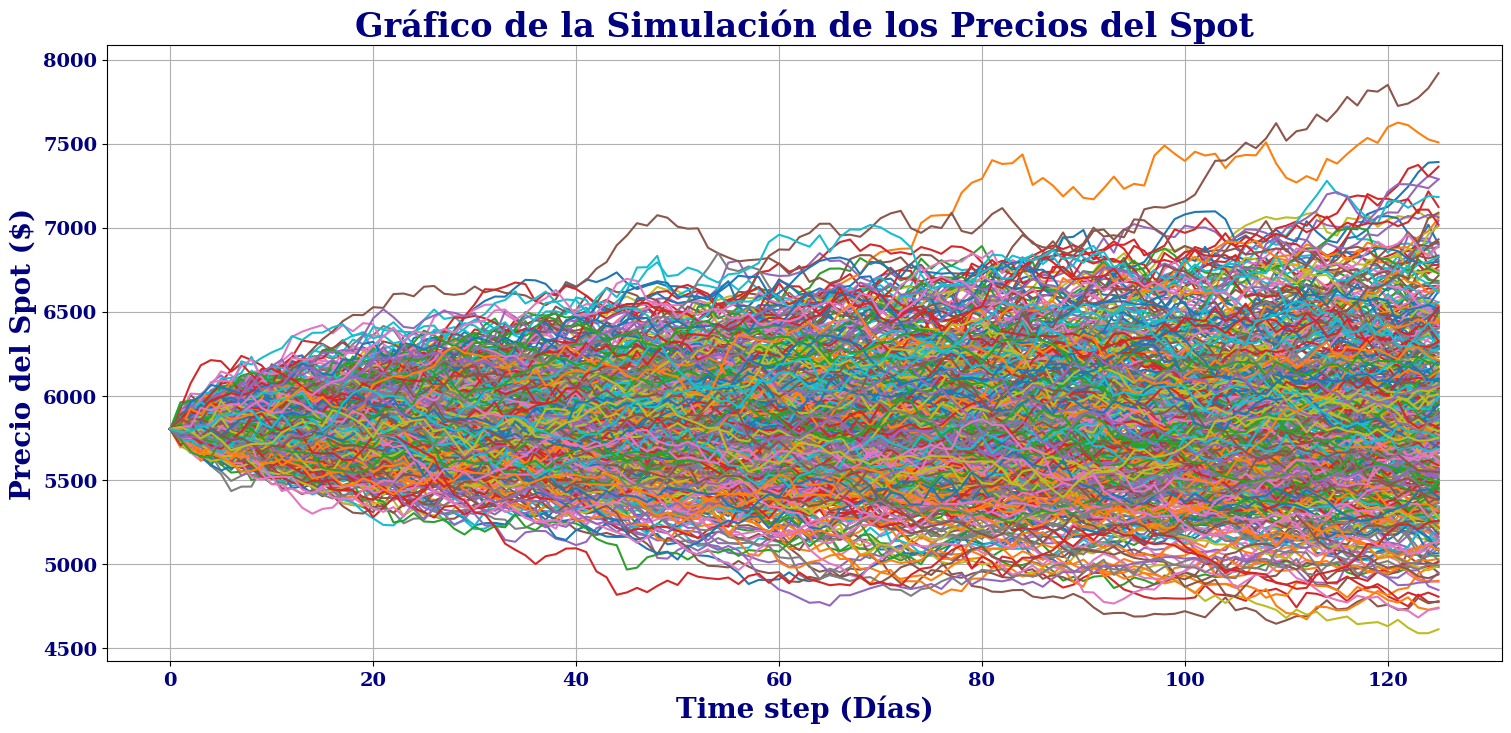

In [ ]:
#Tamaño de la imagen
plt.figure(figsize=(18,8), facecolor="white")
#Fuente de Letra
plt.rcParams['font.family'] = 'DejaVu Serif'
# Graficar los precios
plt.plot(precios)
#Título del gráfico
plt.title('Gráfico de la Simulación de los Precios del Spot',
          fontsize = 24, color = 'navy',fontweight='bold')
#Valores de los ejes X & Y
plt.xticks(fontsize=14, color='navy',fontweight='bold')
plt.yticks(fontsize=14, color='navy',fontweight='bold')
#Ejes X & Y
plt.xlabel('Time step (Días)',fontsize = 20,
           color = 'navy',fontweight='bold')
plt.ylabel('Precio del Spot ($)',fontsize = 20,
           color = 'navy',fontweight='bold')

#Mostar cuadriculas
plt.grid(True)
#Mostrar gráfico
plt.show()


---
# **3. Primas de las opciones call y put**🧠
---

$$
\text{Payoff Call}= \text{Max} (S_{t}-K , 0)
$$

$$
\text{Payoff Put}= \text{Max} (K-S_{t} , 0)
$$

In [ ]:
#Dataframe vacio
Pay_Call_Put=pd.DataFrame(data=np.nan,
                      index=np.arange(0,n),
                      columns=['Precio Spot','Payoff Call','Payoff Put']
                      )
#Precio Spot := Fila del dataframe precios
Pay_Call_Put['Precio Spot']=precios.loc[nt-1]
#Ciclo para calcular payoffs para cada simulación
for i in range(0,n):
  #Calculo del Payoff Call para cada fila
  Pay_Call_Put.loc[i,'Payoff Call']=np.maximum(Pay_Call_Put.loc[i,'Precio Spot'] -K,0)/np.exp(R*T)
  #Calculo del Payoff Put para cada fila
  Pay_Call_Put.loc[i,'Payoff Put']=np.maximum(K- Pay_Call_Put.loc[i,'Precio Spot'],0)/np.exp(R*T)
#Mostrar dataframe
Pay_Call_Put

,Precio Spot,Payoff Call,Payoff Put
0,5615.241530,0.000000,376.612116
1,6540.738169,529.289312,0.000000
2,5716.135877,0.000000,277.853969
3,6230.930819,226.041402,0.000000
4,7042.564665,1020.490813,0.000000
...,...,...,...
495,4937.814184,0.000000,1039.696533
496,5137.771339,0.000000,843.972999
497,5908.459850,0.000000,89.602003
498,5751.835345,0.000000,242.910353


In [ ]:
#Calculo de las opciones como la media de la columnas
Opcion_Call=Pay_Call_Put['Payoff Call'].mean()
Opcion_Put=Pay_Call_Put['Payoff Put'].mean()
#Imprimir resultado
print(f"El precio para la opción Call es: {Opcion_Call}")
print(f"El precio para la opción Put es: {Opcion_Put}")

El precio para la opción Call es: 157.83140943377873
El precio para la opción Put es: 263.69000992965465


---
# **4. Precio con barrera alta y baja 🚧**
---

In [ ]:
#Inputs para el código de barrera alta y baja
b_a=float(input("¿Cuál es el valor de la barra alta ($) ? "))
b_b=float(input("¿Cuál es el valor de la barra baja ($) ? "))

In [ ]:
#Dataframe vacio
Pay_Call_Put=pd.DataFrame(data=np.nan,
                      index=np.arange(0,n),
                      columns=['Precio Máximo','Precio Mínimo',
                               'Precio Spot','Payoff Call','Payoff Put']
                      )
#Precio Spot := Fila del dataframe precios
Pay_Call_Put['Precio Spot']=precios.loc[nt-1]
Pay_Call_Put['Precio Máximo']=precios.max()
Pay_Call_Put['Precio Mínimo']=precios.min()
#Ciclo para calcular payoffs para cada simulación
for i in range(0,n):
  #Calculo del Payoff Call para cada fila
  Pay_Call_Put.loc[i,'Payoff Call']=np.maximum(Pay_Call_Put.loc[i,'Precio Spot'] -K,0)/np.exp(R*T)
  #Calculo del Payoff Put para cada fila
  Pay_Call_Put.loc[i,'Payoff Put']=np.maximum(K- Pay_Call_Put.loc[i,'Precio Spot'],0)/np.exp(R*T)
#Mostrar dataframe
Pay_Call_Put